In [16]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt



In [18]:
#laod all the dataset 
Node = pd.read_csv('Node_info.csv')
Edge = pd.read_csv('Edge_info.csv')
dat2 = pd.read_csv('Song_attribute.csv')
Edge.head()

,edge,edge_weight
0,"('Wale', 'Big Sean')",2.0
1,"('2 Chainz', 'Big Sean')",5.0
2,"('Rick Ross', 'Big Sean')",3.0
3,"('Young Money', 'Big Sean')",0.0
4,"('ScHoolboy Q', 'Big Sean')",0.0


In [39]:
#extrac the data needed 
Nodes = Node['node'].tolist()
Node_size = Node['node_size'].tolist()
Node_color = Node['node_color'].tolist()
print(Node_color)
Edges = Edge['edge'].tolist()

# Make edges tuples
new_edges = []
for x in Edges:
    x = x[1:-1]
    x = x.split(", ")
    z = []
    for y in x:
        y = y[1:-1]
        z.append(y)
    z = tuple(z)
    new_edges.append(z)
    
Edges = new_edges

Edge_weights = Edge['edge_weight'].tolist()



[4.0, 6.0, 9.0, 7.0, 10.0, 7.0, 7.0, 7.0, 4.0, 9.0, 8.0, 6.0, 6.0, 4.0, 3.0, 4.0, 5.0, 7.0, 5.0, 9.0, 7.0, 8.0, 8.0, 8.0, 5.0, 7.0, 6.0, 8.0, 7.0, 7.0, 9.0, 7.0, 8.0, 6.0, 3.0, 3.0, 7.0, 4.0, 7.0, 4.0, 4.0, 5.0, 9.0, 8.0, 8.0, 9.0, 6.0, 9.0, 10.0, 9.0, 6.0, 10.0, 9.0, 8.0, 7.0, 7.0, 8.0, 10.0, 9.0, 8.0, 10.0, 11.0, 7.0, 7.0, 12.0, 7.0, 8.0, 5.0, 10.0, 7.0, 7.0, 9.0, 2.0, 9.0, 7.0, 4.0, 6.0, 6.0, 4.0, 2.0, 5.0, 6.0, 4.0, 2.0, 2.0, 6.0, 6.0, 2.0, 4.0, 4.0, 7.0, 6.0, 7.0, 11.0, 8.0, 7.0, 7.0, 10.0, 6.0, 7.0, 8.0, 4.0, 6.0, 4.0, 3.0, 8.0, 6.0, 5.0, 5.0, 7.0, 6.0, 8.0, 5.0, 6.0, 8.0, 5.0, 6.0, 12.0, 8.0, 6.0, 9.0, 8.0, 12.0, 8.0, 6.0, 5.0, 7.0, 1.0, 1.0, 3.0, 3.0, 8.0, 3.0, 2.0, 2.0, 6.0, 6.0, 5.0, 9.0, 4.0, 4.0, 3.0, 9.0, 6.0, 4.0, 7.0, 10.0, 5.0, 3.0, 6.0, 5.0, 4.0, 7.0, 5.0, 7.0, 4.0, 3.0, 5.0, 3.0, 2.0, 5.0, 3.0, 2.0, 8.0, 5.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 9.0, 6.0, 5.0, 2.0, 3.0, 6.0, 0.0, 5.0, 6.0, 2.0, 1.0, 5.0, 2.0, 2.0, 4.0, 4.0, 10.0, 2.0, 4.0, 3.0, 7.0, 2.0, 1.0, 1.0, 0.0, 2.0, 

ValueError: s must be a scalar, or float array-like with the same size as x and y

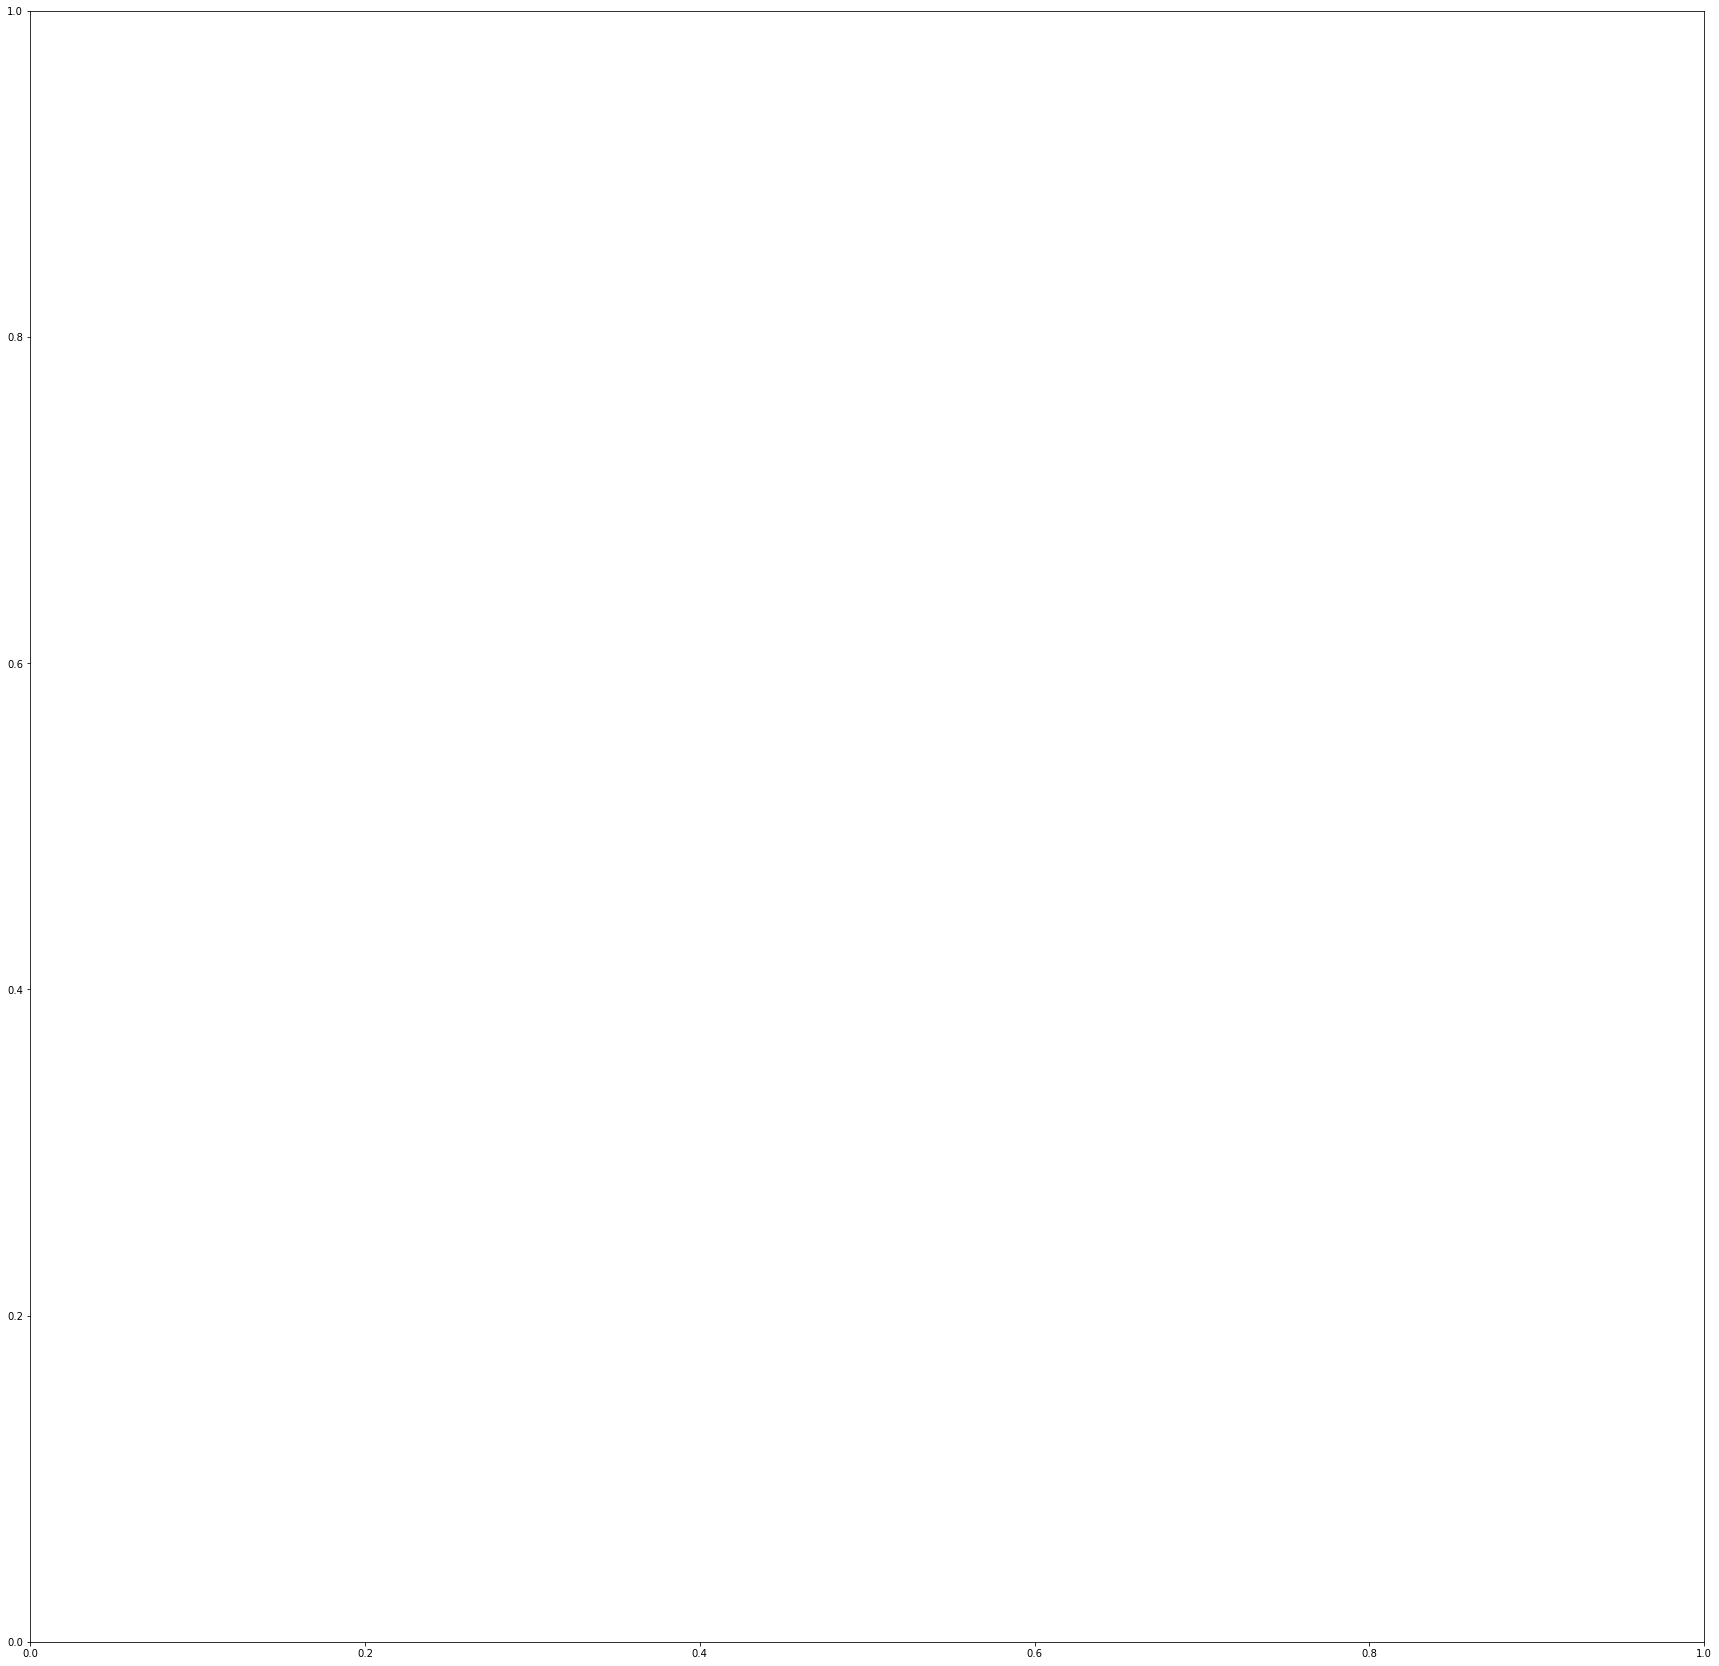

In [36]:
#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
  Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
  for index, rows in dat2.iterrows():
    if rows.artist == key:
      Art[key][rows.song_name] = rows.song_info


#add node and weight
for i in range(len(Nodes)):
  G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]],diversity = Node_color[i])
#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
  if Edge_weights[i] == 0:
    Edge_weights[i] = 2
  elif Edge_weights[i] == 1:
    Edge_weights[i] = 3
  elif Edge_weights[i] == 2:
    Edge_weights[i] = 4
  elif Edge_weights[i] == 3:
    Edge_weights[i] = 5
  elif Edge_weights[i] > 3:
    Edge_weights[i] = 7
    
#fig, ax = plt.subplots(figsize=(30,30))

#nx.draw(G,with_labels=True,node_size = Node_size,node_color =Node_color,width = Edge_weights)


# Network Analysis

Average Degree:  6.0181818181818185
GENERAL
	number of nodes: 440
	number of edges: 1324
	is_directed: False
	is_weighted: False
	number_connected_components 1
	number of triangle:  440
	density: 0.013708842410436944
	average_clustering coefficient:  0.31040074447036664
	degree_assortativity_coefficient:  -0.3829461447546472
	is_tree: False
	diameter: 8
	radius: 4
	average_shortest_path_length:  4.110861462000414
DEGREE (NORMALIZED)
	min: 0.002277904328018223
	mean: 0.01370884241043694
	median: 0.004555808656036446
	max: 0.07744874715261958
	top nodes: ['PnB Rock', 'Lil Yachty', 'Freddie Gibbs', 'Quavo', 'Rick Ross', 'NAV']
	           [0.07744874715261958, 0.07517084282460136, 0.07289293849658314, 0.07289293849658314, 0.07061503416856492, 0.07061503416856492]
CLOSENESS CENTRALITY
	min: 0.17128365197034726
	mean: 0.2487186347936966
	median: 0.2431459615992245
	max: 0.3526104417670683
	top nodes: ['2 Chainz', 'Big Sean', 'Rick Ross', 'Ty Dolla ign', 'Tory Lanez', 'PnB Rock']
	          

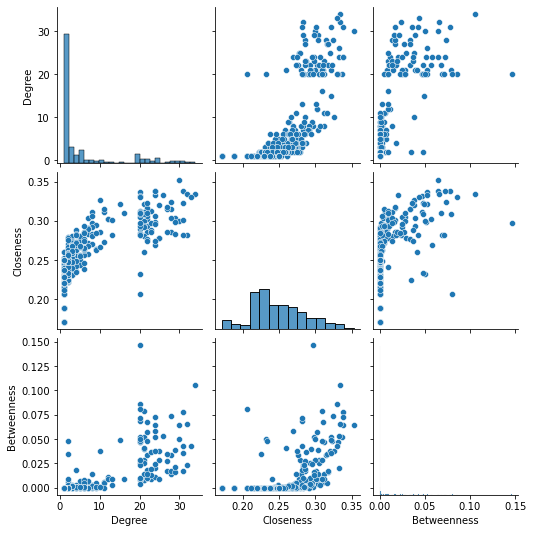

In [41]:
import nx_tools as nxt
import shutil
import random
from importlib import reload  # Python 3.4+
import os
import seaborn as sns
import math

# Isolate GCC
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

def build_output_folder(out_dir_path):
    if(os.path.exists(out_dir_path)):
        shutil.rmtree(out_dir_path)
    os.mkdir(out_dir_path)

output_folder="outputs"
build_output_folder(output_folder)


output_root = "network_analysis_cent_corr"
nxt.ave_degree(G0)
nxt.network_summary(G0)
nxt.plot_centrality_correlation(G0,path=output_folder+"/"+output_root+".pdf")

# Community Detection

Text(0.5, 0, 'Algorithm step')

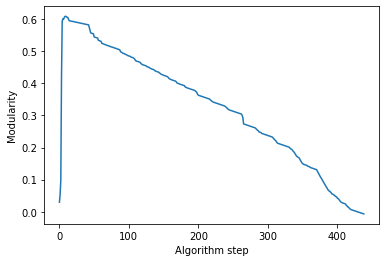

In [57]:
# Create Partitions
import itertools
partition_sequence = nx.community.girvan_newman(G0)
ps = []
k = round(G0.number_of_nodes()-1)
for i in range(0,k):
    
    ps.append(tuple(sorted(c) for c in next(partition_sequence)))

modularity_sequence = [nx.community.quality.modularity(G0, p) for p in ps]


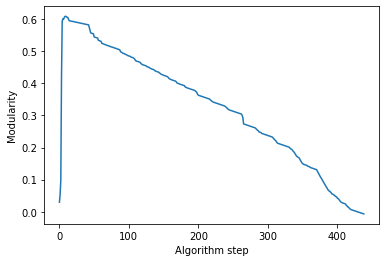

In [63]:
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')
plt.savefig("community_detection_modularity_plot.png")

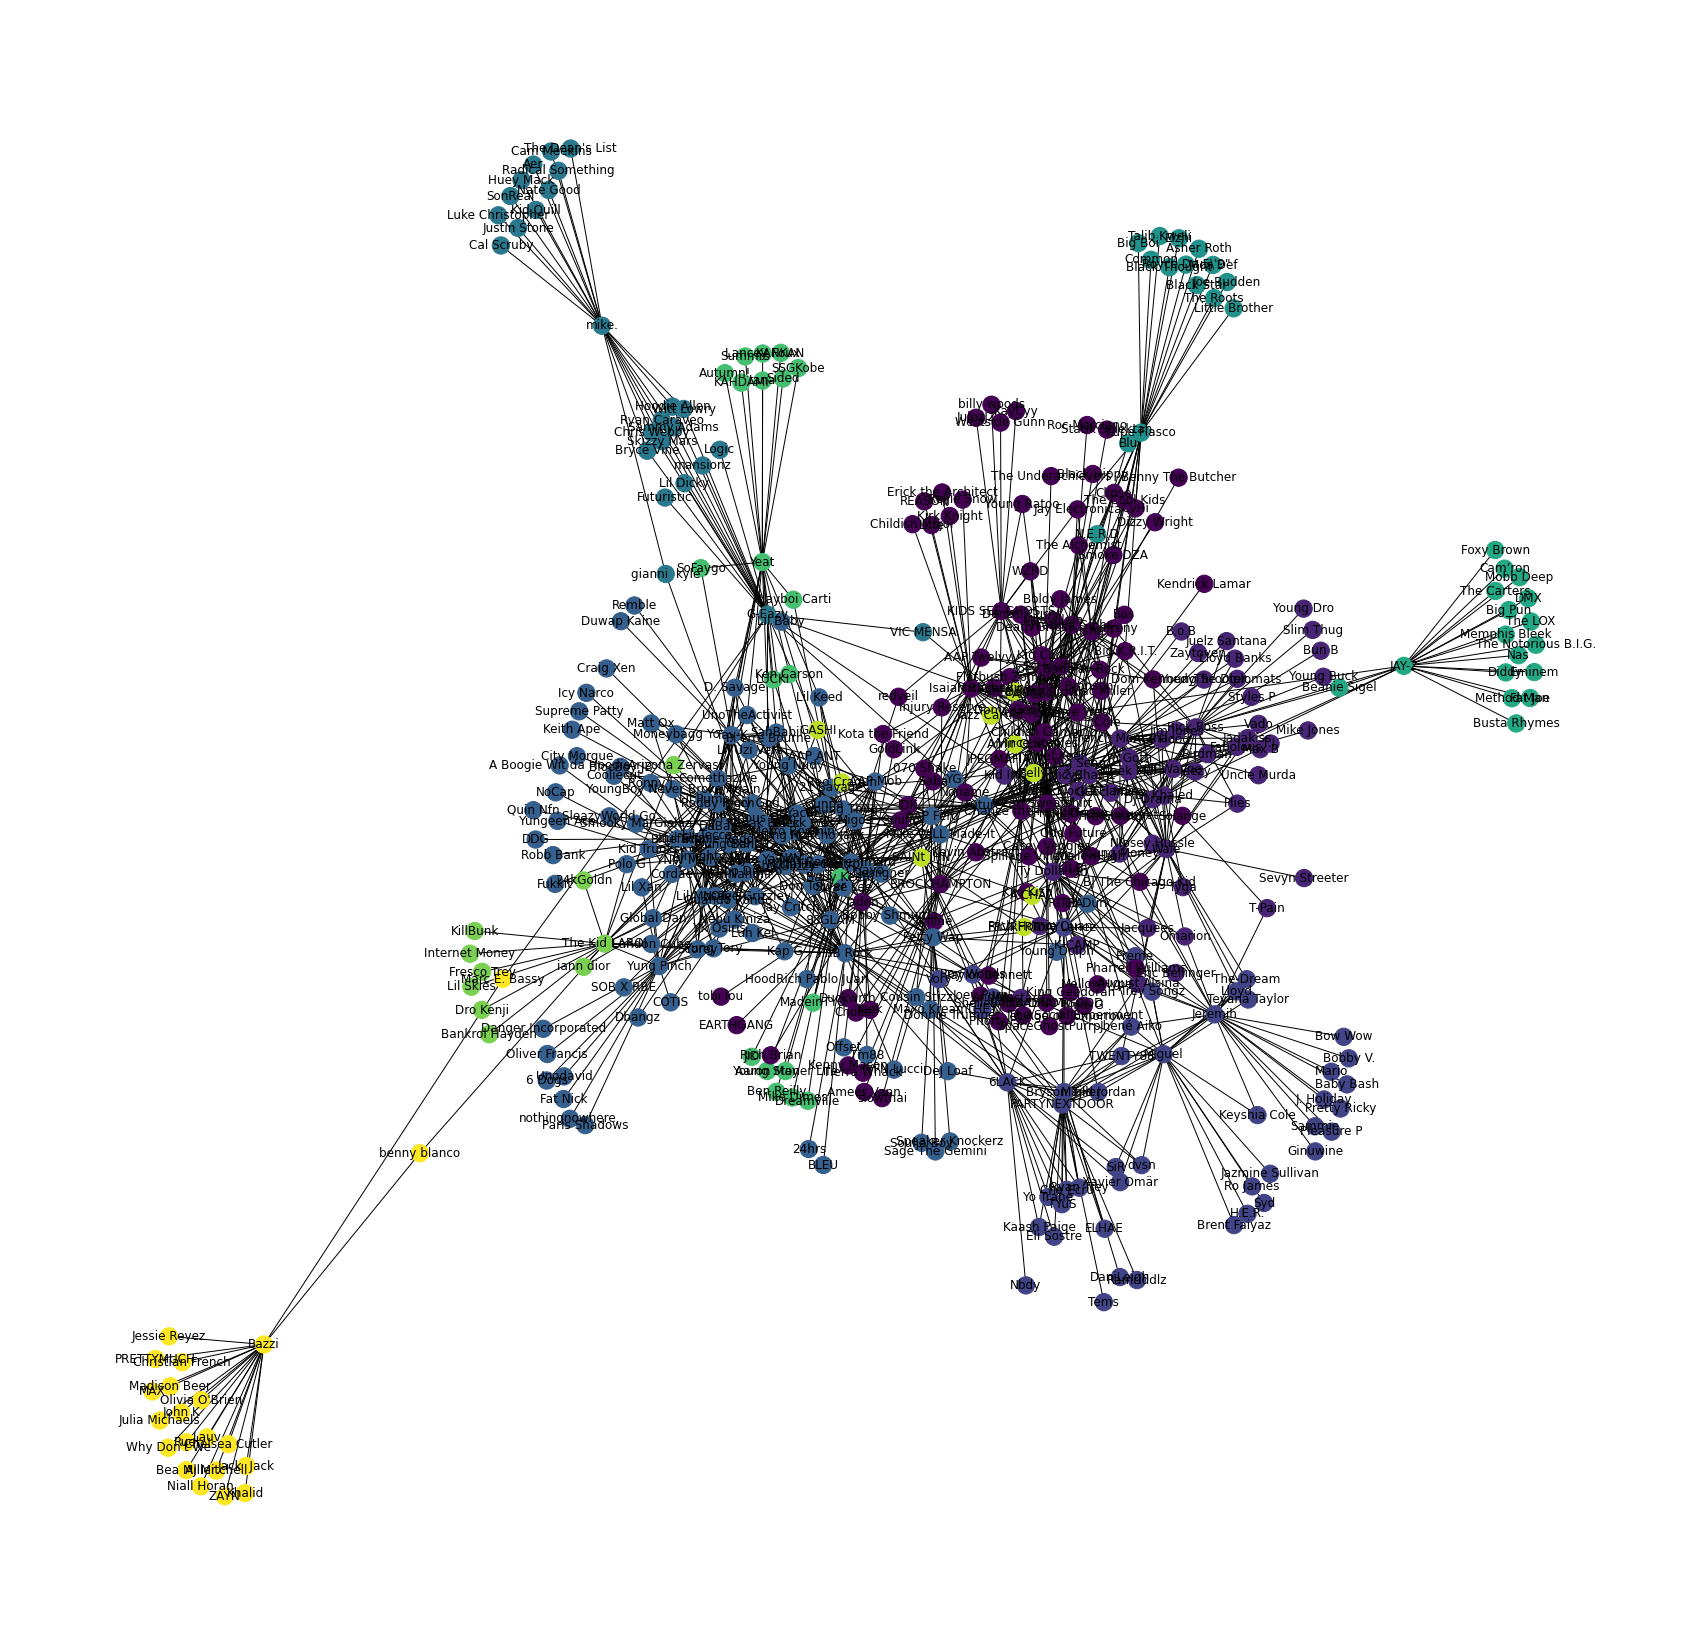

In [62]:
index_max = max(range(len(modularity_sequence)), key=modularity_sequence.__getitem__)
best_partition = ps[index_max]

def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map
fig, ax = plt.subplots(figsize=(30,30))
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G0.nodes()]
nx.draw(G0, with_labels=True, node_color=node_colors)
plt.savefig("communities.png")

In [60]:
nx.community.quality.modularity(G0, best_partition)

0.6087918488330702